In [1]:
from datamatrix import io
import numpy as np
from matplotlib import pyplot as plt
from datamatrix import operations as ops, DataMatrix, FloatColumn

In [2]:
dm = io.readpickle('../outputs/correlation-matrix.pkl')
ldm = io.readtxt('../outputs/longish-correlation-matrix.csv')

In [3]:
MAX_ERR = 30
XC = 80
YC = 64


def mask(nft, mask):
    
    nft.get_data()[mask] = np.nan


for row in dm:
    a = row.prf_err.get_data()
    err = np.where(a > MAX_ERR)
    n_poor = len(err[0])
    n_total = np.sum(~np.isnan(a))
    print('poor {} of {}'.format(n_poor, n_total))
    mask(row.prf_x, err)
    mask(row.prf_y, err)
    mask(row.prf_sd, err)
    mask(row.prf_err, err)
    mask(row.r_vc_pupil, err)
    mask(row.r_vc_lc, err)
    

dm.r_pupil = [np.nanmedian(row.r_vc_pupil.get_data()) for row in dm]
dm.r_lc = [np.nanmedian(row.r_vc_lc.get_data()) for row in dm]
dm.m_prf_err = [np.nanmedian(row.prf_err.get_data()) for row in dm]
dm.m_prf_sd = [np.nanmedian(row.prf_sd.get_data()) for row in dm]
dm.m_prf_absx = [np.nanmedian(np.abs(row.prf_x.get_data() - XC)) for row in dm]
dm.m_prf_absy = [np.nanmedian(np.abs(row.prf_y.get_data() - YC)) for row in dm]
dm.m_prf_ecc = [
    np.nanmedian(
        (
            (row.prf_y.get_data() - XC) ** 2 +
            (row.prf_y.get_data() - YC) ** 2
        ) ** .5
    )
    for row in dm
]
print('Before {}'.format(len(ldm)))
ldm = ldm.prf_err <= MAX_ERR
print('After {}'.format(len(ldm)))

/home/sebastiaan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in greater
  del sys.path[0]


poor 894 of 2040
poor 357 of 1056
poor 134 of 296
poor 176 of 256
poor 1108 of 2040
poor 383 of 1056
poor 190 of 296
poor 159 of 256
poor 912 of 2040
poor 481 of 1056
poor 170 of 296
poor 132 of 256
poor 1288 of 2040
poor 535 of 1056
poor 156 of 296
poor 150 of 256
poor 1360 of 2040
poor 550 of 1056
poor 247 of 296
poor 168 of 256
poor 547 of 2040
poor 268 of 1056
poor 60 of 296
poor 102 of 256
poor 920 of 2040
poor 341 of 1056
poor 121 of 296
poor 148 of 256
poor 895 of 2040
poor 377 of 1056
poor 186 of 296
poor 124 of 256
poor 1088 of 2040
poor 543 of 1056
poor 136 of 296
poor 142 of 256
poor 1313 of 2040
poor 590 of 1056
poor 174 of 296
poor 146 of 256
poor 1226 of 2040
poor 456 of 1056
poor 163 of 296
poor 170 of 256
poor 1341 of 2040
poor 542 of 1056
poor 204 of 296
poor 167 of 256
poor 927 of 2040
poor 368 of 1056
poor 173 of 296
poor 154 of 256
poor 940 of 2040
poor 482 of 1056
poor 164 of 296
poor 193 of 256
poor 493 of 2040
poor 236 of 1056
poor 94 of 296
poor 53 of 256
Before

# Overall correlation per ROI

/home/sebastiaan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


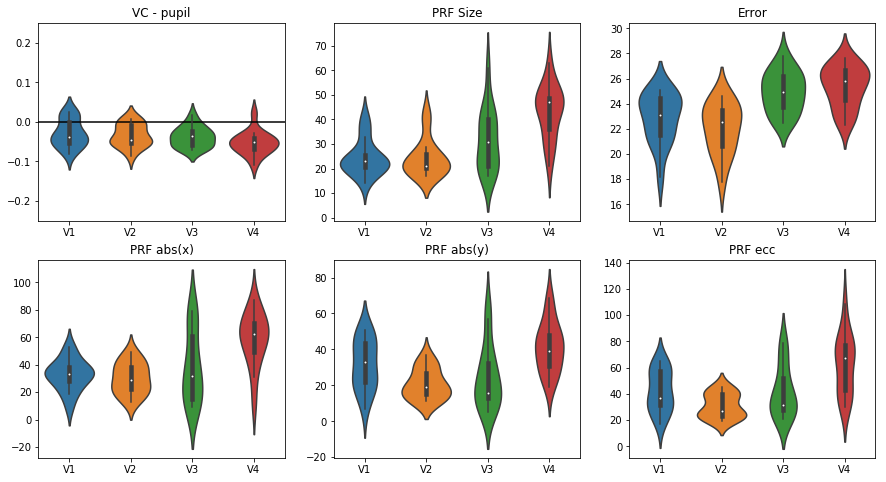

In [4]:
import seaborn as sns

plt.figure(figsize=(15, 8))
plt.subplot(2,3,1)
plt.title('VC - pupil')
plt.axhline(0, color='black')
plt.ylim(-.25, .25)
sns.violinplot(x='roi', y='r_pupil', data=dm)
plt.subplot(2,3,2)
plt.title('PRF Size')
sns.violinplot(x='roi', y='m_prf_sd', data=dm)
plt.subplot(2,3,3)
plt.title('Error')
sns.violinplot(x='roi', y='m_prf_err', data=dm)

plt.subplot(2,3,4)
plt.title('PRF abs(x)')
sns.violinplot(x='roi', y='m_prf_absx', data=dm)
plt.subplot(2,3,5)
plt.title('PRF abs(y)')
sns.violinplot(x='roi', y='m_prf_absy', data=dm)
plt.subplot(2,3,6)
plt.title('PRF ecc')
sns.violinplot(x='roi', y='m_prf_ecc', data=dm)


In [5]:
from scipy import stats
from datamatrix import operations as ops
for roi, rdm in ops.split(dm.roi):
    t, p = stats.ttest_1samp(rdm.r_pupil, 0)
    print('{}: t({}) = {:.2f}, p = {:4f}'.format(roi, len(rdm) - 1, t, p))

V1: t(14) = -3.27, p = 0.005640
V2: t(14) = -4.64, p = 0.000381
V3: t(14) = -5.75, p = 0.000050
V4: t(14) = -6.97, p = 0.000007


In [6]:
from datamatrix import convert as cnv
from pandas import pivot_table
pivot_table = cnv.wrap_pandas(pivot_table)

pm = pivot_table(dm, values='r_pupil', index='sub', columns='roi')
io.writetxt(pm, 'outputs/pivot-r-vc-pupil.csv')
pm = pivot_table(dm, values='r_lc', index='sub', columns='roi')
io.writetxt(pm, 'outputs/pivot-r-vc-lc.csv')

# Correlations with RF properties

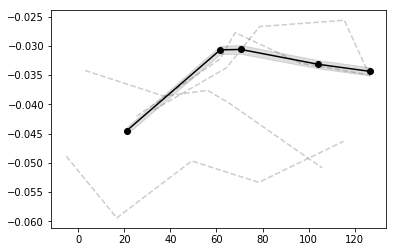

In [7]:
def bin_plot(dm, x, y, label=None, bins=5):

    lx = []
    ly = []
    lmin = []
    lmax = []
    for bdm in ops.bin_split(dm[x], bins=bins):
        lx.append(bdm[x].mean)
        ly.append(bdm[y].mean)
        lmin.append(bdm[y].mean - bdm[y].std / len(bdm[y]) ** .5)
        lmax.append(bdm[y].mean + bdm[y].std / len(bdm[y]) ** .5)
    if label:
        alpha = .2
        fmt = '--'
    else:
        alpha = 1
        label = 'Overall'
        fmt = 'o-'
        plt.fill_between(lx, lmin, lmax, alpha=.25, color='gray')
    plt.plot(lx, ly, fmt, label=label, alpha=alpha, color='black')
    

iv = 'prf_y'
for i, (roi, rdm) in enumerate(ops.split(ldm.roi)):
    bin_plot(rdm, iv, 'r_vc_pupil', roi)
bin_plot(ldm, iv, 'r_vc_pupil')

In [8]:
from datamatrix.rbridge import lme4

lme4.lmer(ldm, 'r_vc_pupil ~ (1|sub)')

Initializing cache ...
@cached: calling <function lmer at 0x7f22d3097400>


/home/sebastiaan/git/studyforrest-prf/code/datamatrix/io/_text.py:52: DeprecationWarning: 'U' mode is deprecated
  with safe_open(path, u'Ur') as csvfile:


df,effect,est,p,se,t
14.0011151939578,(Intercept),-0.0337320551107835,0.000461446457373152,0.00742828926087787,-4.54102605945061


In [9]:
ldm.c_roi = ldm.roi @ (lambda roi: 0 if roi == 'V1' else 1 if roi == 'V2' else 2 if roi == 'V3' else 3)
lme4.lmer(ldm, 'r_vc_pupil ~ c_roi + (1+c_roi|sub)')

@cached: calling <function lmer at 0x7f22d3097400>


/home/sebastiaan/git/studyforrest-prf/code/datamatrix/io/_text.py:52: DeprecationWarning: 'U' mode is deprecated
  with safe_open(path, u'Ur') as csvfile:


df,effect,est,p,se,t
13.9958651524862,(Intercept),-0.0301172965195406,0.00251235727337425,0.00820113691079025,-3.67233187875638
13.989185246967,c_roi,-0.00540825187567777,0.014619618086171,0.00194206683203783,-2.78479184467758


In [11]:
lme4.lmer(ldm, 'r_vc_pupil ~ prf_y + (1+prf_y|sub)')

@cached: calling <function lmer at 0x7f22d3097400>


/home/sebastiaan/git/studyforrest-prf/code/datamatrix/io/_text.py:52: DeprecationWarning: 'U' mode is deprecated
  with safe_open(path, u'Ur') as csvfile:


df,effect,est,p,se,t
5.92394908799767,(Intercept),-0.0403388734784725,0.00805709114210467,0.0103064461938157,-3.91394596351529
10.136743963986,prf_y,8.9110028299981e-05,0.0147459848146017,3.03758449314056e-05,2.93358188064261


In [15]:
lme4.lmer(ldm, 'r_vc_pupil ~ prf_x + (1+prf_x|sub)')

@cached: calling <function lmer at 0x7f22d3097400>


/home/sebastiaan/git/studyforrest-prf/code/datamatrix/io/_text.py:52: DeprecationWarning: 'U' mode is deprecated
  with safe_open(path, u'Ur') as csvfile:


df,effect,est,p,se,t
4.263906971933,(Intercept),-0.0324206230717954,0.0391862984773655,0.0110280277706993,-2.93983872238104
9.63330739545227,prf_x,-1.64845635776125e-05,0.634892046993471,3.3620992863997e-05,-0.490305674323644


In [13]:
lme4.lmer(ldm, 'r_vc_pupil ~ ecc + (1+ecc|sub)')

@cached: calling <function lmer at 0x7f22d3097400>


/home/sebastiaan/git/studyforrest-prf/code/datamatrix/io/_text.py:52: DeprecationWarning: 'U' mode is deprecated
  with safe_open(path, u'Ur') as csvfile:


df,effect,est,p,se,t
19.2427481282209,(Intercept),-0.0271590466213183,0.00371317784680333,0.00822882390245382,-3.30047731526003
15.4538775796467,ecc,-0.000131517603066067,0.116179395393454,7.90196373465479e-05,-1.66436606750401


In [14]:
lme4.lmer(ldm, 'r_vc_pupil ~ prf_sd + (1+prf_sd|sub)')

@cached: calling <function lmer at 0x7f22d3097400>


/home/sebastiaan/git/studyforrest-prf/code/datamatrix/io/_text.py:52: DeprecationWarning: 'U' mode is deprecated
  with safe_open(path, u'Ur') as csvfile:


df,effect,est,p,se,t
17.6625383005667,(Intercept),-0.0342515895000675,0.000625527648775525,0.00825664868408105,-4.1483646465551
15.1328612532197,prf_sd,3.32045990854453e-06,0.981940175465601,0.000144282750135024,0.0230135612568872
